In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


All data is categorical apart from Tenure, monthly charges and total charges. All else will be coded. Data is 7043 rows × 21 columns. Will have to check the kind of info customer id has

In [42]:
df[['A', 'B']] = df['customerID'].str.split('-', expand=True)
df[['A', 'B']]

,A,B
0,7590,VHVEG
1,5575,GNVDE
2,3668,QPYBK
3,7795,CFOCW
4,9237,HQITU
...,...,...
7038,6840,RESVB
7039,2234,XADUH
7040,4801,JZAZL
7041,8361,LTMKD


In [43]:
df['A'].value_counts()

3097    5
0516    5
5442    5
1866    5
4291    5
       ..
8885    1
3656    1
1582    1
1527    1
8028    1
Name: A, Length: 5084, dtype: int64

In [44]:
df['B'].value_counts()

GSODA    2
VUVJN    2
CYWMH    2
PQHBB    1
IZYOZ    1
        ..
FJARJ    1
IMHCC    1
BQCUW    1
GDWGV    1
VRSAB    1
Name: B, Length: 7040, dtype: int64

There is no data value in these columns. Dropping all.

In [45]:
df = df.drop(['customerID', 'A', 'B'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [46]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.65       8
           ..
890.35      1
762.5       1
2010.55     1
2804.45     1
4228.55     1
Name: TotalCharges, Length: 6531, dtype: int64

In [48]:
#There are missing values in total charges. Total charges needs to be converted to int.
df['TotalCharges'].str.strip()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [49]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [50]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [51]:
#There is visible skew in the TotalCharges. Let's deal with it further down the model with z score and yeo johnson
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

In [52]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
for i in df:
    if df[i].dtypes == 'object':
        s1 = lenc.fit_transform(df[i])
        s1 = pd.DataFrame(s1)
        df[i] = s1
    else:
        continue
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


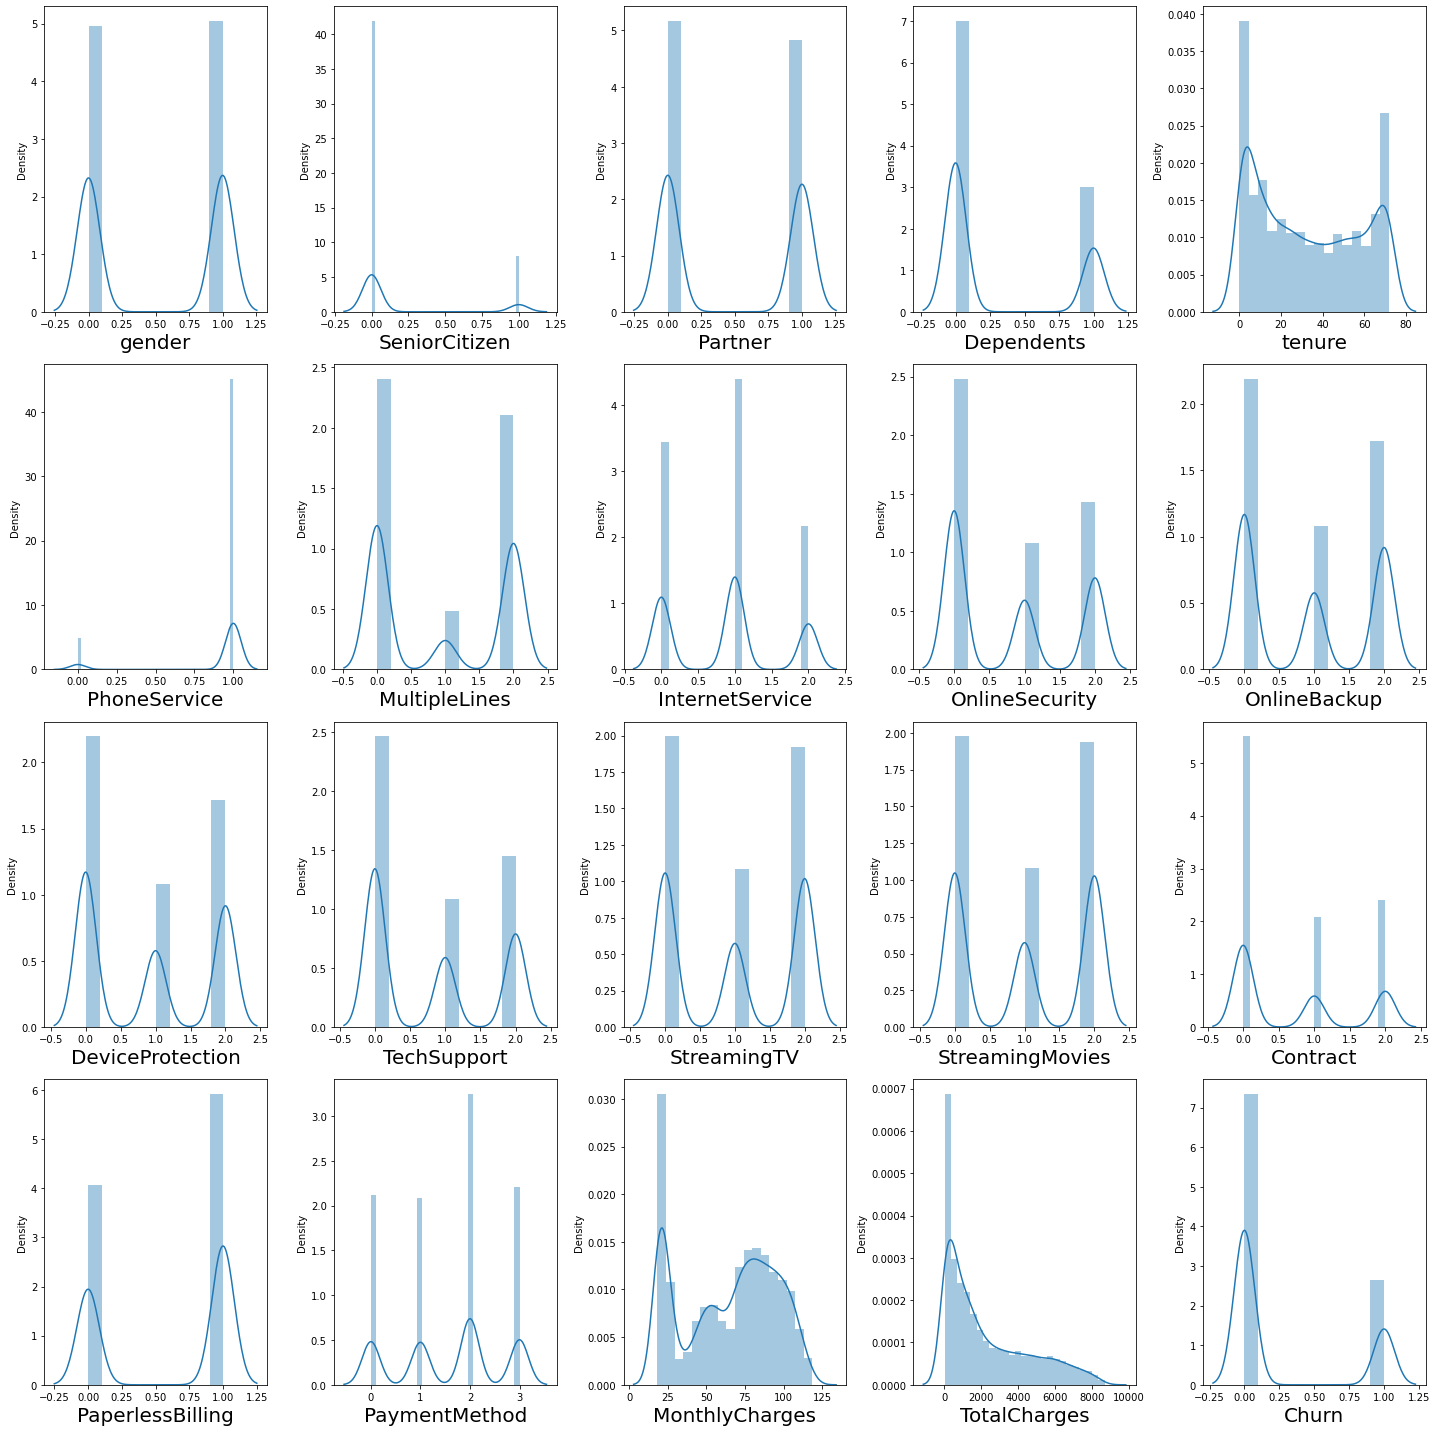

In [53]:
plt.figure(figsize=(20,20))
pltn = 1
for c in df:
    ax= plt.subplot(4,5,pltn)
    sns.distplot(df[c])  
    plt.xlabel(c,fontsize=20)
    pltn+=1
plt.tight_layout()

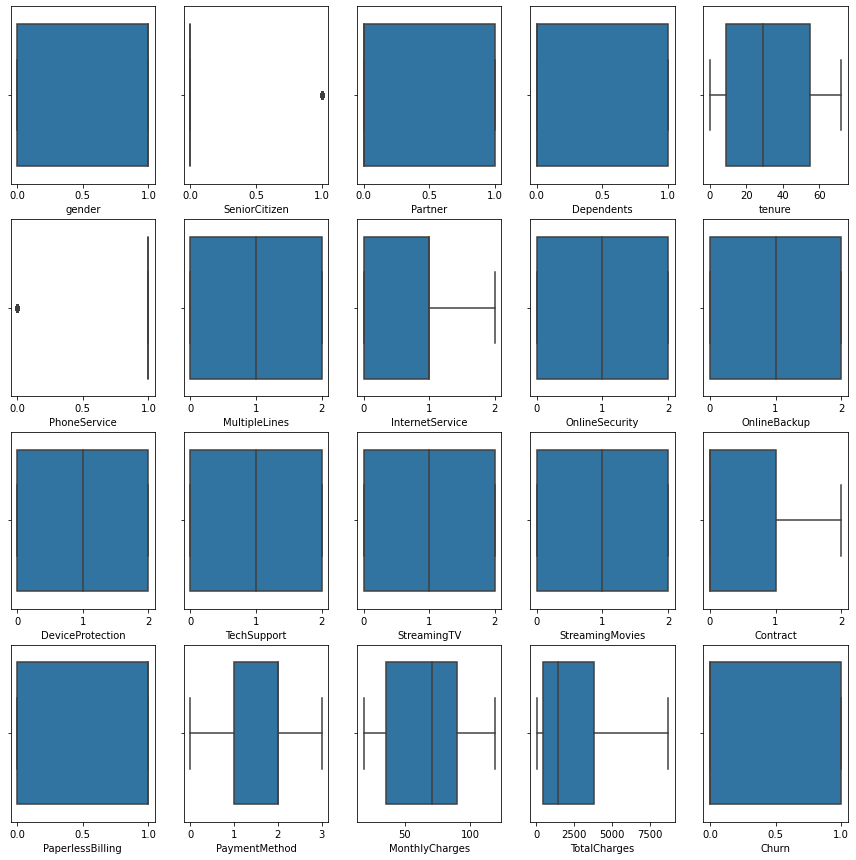

In [54]:
#Total charges are very skewed. Let's look at its box plot
plt.figure(figsize=(15,15))
gr = 1
for c in df:
    ax = plt.subplot(4, 5, gr)
    sns.boxplot(df[c])
    plt.xlabel(c, fontsize = 10)
    gr+=1
plt.show()

In [56]:
#The plot does not show any outliers. Applying yeo - Johnson to remove skewness.
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
dfn1 = power.fit_transform(df[['TotalCharges']])
dfn1 = pd.DataFrame(dfn1)
dfn1.columns = df[['TotalCharges']].columns
df.index = dfn1.index
for i in dfn1:
    df[i] = dfn1[i]
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges       -0.144899
Churn               1.063031
dtype: float64

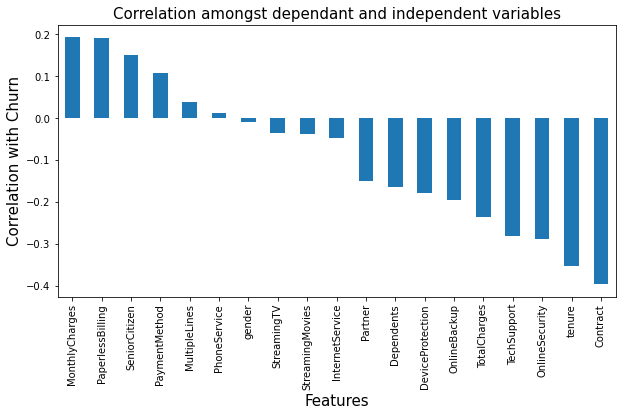

In [57]:
#Skew is removed. Checking for correlation, multicollinearity and K score.
df2 = df.corr()
plt.figure(figsize=(10,5))
df2['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar')
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Correlation with Churn', fontsize = 15)
plt.title('Correlation amongst dependant and independent variables', fontsize = 15)
plt.show()

In [69]:
#low correlation with phone service, gender, Streaming TV, Streaming movies, Multiple lines and Internet service. 
#May remove the above in case of multicollinearity
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

from sklearn.feature_selection import SelectKBest, f_classif
bf= SelectKBest(score_func = f_classif, k='all')
fit = bf.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

#concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature name', 'Score']
print(feature_scores.nlargest(19,'Score'))

        Feature name        Score
14          Contract  1315.088872
4             tenure   997.268010
8     OnlineSecurity   643.162019
11       TechSupport   610.610024
18      TotalCharges   419.355530
9       OnlineBackup   279.877370
17    MonthlyCharges   273.463704
15  PaperlessBilling   268.985218
10  DeviceProtection   230.744618
3         Dependents   195.149314
1      SeniorCitizen   164.041424
2            Partner   163.060036
16     PaymentMethod    81.641664
7    InternetService    15.782320
13   StreamingMovies    10.447463
6      MultipleLines    10.201712
12       StreamingTV     9.434674
5       PhoneService     1.004266
0             gender     0.522257


In [70]:
df['Churn'].value_counts()
#Data is imbalanced. Need to balance.

0    5174
1    1869
Name: Churn, dtype: int64

In [71]:
#low K scores of with phone service, gender, Streaming TV, Streaming movies, Multiple lines and Internet service. Removing.
X = X.drop(['gender', 'PhoneService', 'StreamingTV', 'MultipleLines', 'StreamingMovies', 'InternetService'], axis = 1)
vif1 = pd.DataFrame()
Xsc = np.asarray(x)
vif1['score'] = [variance_inflation_factor(Xsc,i) for i in range (Xsc.shape[1])]
vif1['Feature'] = x.columns
vif1

,score,Feature
0,1.358870,SeniorCitizen
1,2.817493,Partner
2,1.953824,Dependents
3,10.976118,tenure
4,2.239964,OnlineSecurity
5,2.417629,OnlineBackup
6,2.514164,DeviceProtection
7,2.357459,TechSupport
8,4.085813,Contract
9,2.906797,PaperlessBilling


In [72]:
#Tenure and monthly charges have high score. May remove in case of issue.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23, shuffle = True, stratify = y)
!pip install imblearn
!pip install delayed 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train)
dtc = DecisionTreeClassifier()
lreg = LogisticRegression()
rfc = RandomForestClassifier()
knc = KNeighborsClassifier()
from sklearn.model_selection import cross_val_score
dtc.fit(X_train_new, y_train_new)
lreg.fit(X_train_new, y_train_new)
rfc.fit(X_train_new, y_train_new)
knc.fit(X_train_new, y_train_new)
print(dtc.score(X_test,y_test), lreg.score(X_test,y_test), rfc.score(X_test,y_test), knc.score(X_test,y_test))

0.7115275411697899 0.7331061896649631 0.7614991482112436 0.7103918228279387


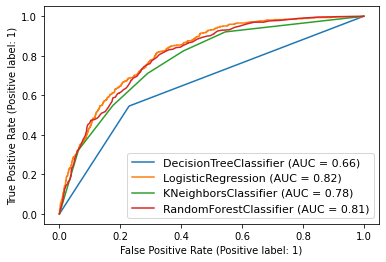

In [75]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dtc, X_test, y_test)
plot_roc_curve(lreg, X_test, y_test, ax=disp.ax_) #ax_ = axes with confusion matrix. look at the axes below
plot_roc_curve(knc, X_test, y_test, ax=disp.ax_)
plot_roc_curve(rfc, X_test, y_test, ax=disp.ax_)
plt.legend(prop = {'size': 11}, loc = 'lower right') # loc gives location of legend
plt.show()

In [76]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtc, X, y, cv=5).mean())
print(cross_val_score(rfc, X, y, cv=5).mean())
print(cross_val_score(knc, X, y, cv=5).mean())
print(cross_val_score(lreg, X, y, cv=5).mean())

0.7246914115426801
0.7907156308471514
0.7674298543454416
0.8030670325504872


In [74]:
#random forest  has the highest accuracy and cv score with good area under the curve. Performing CV
from sklearn.model_selection import GridSearchCV
params = {'bootstrap': [True, False],
          'n_estimators': [100, 150, 200],
          'criterion' : ['entropy', 'gini'],
          'max_depth': [13, 15, 17],
         'min_samples_split': [5, 10],
         'min_samples_leaf': [5, 10]}
grd.fit(X_train_new, y_train_new)
print(grd.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 250}


In [77]:
rfc = grd.best_estimator_
rfc.fit(X_train_new, y_train_new)
rfc.score(X_test,y_test)

0.7586598523566156

In [78]:
#Saving file.
import joblib
joblib.dump(rfc, 'Churn.pkl')

['Churn.pkl']